In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['font.size'] = 12  # global font size
from get_data import read_MDC_data, convert_to_frequency_series_with_psd, convert_data_dict_to_frequency_series_dict
from likelihood import MDCGaussianNoise

### Test `read_MDC_data`

In [2]:
data = read_MDC_data(1000000000, 1000000010)

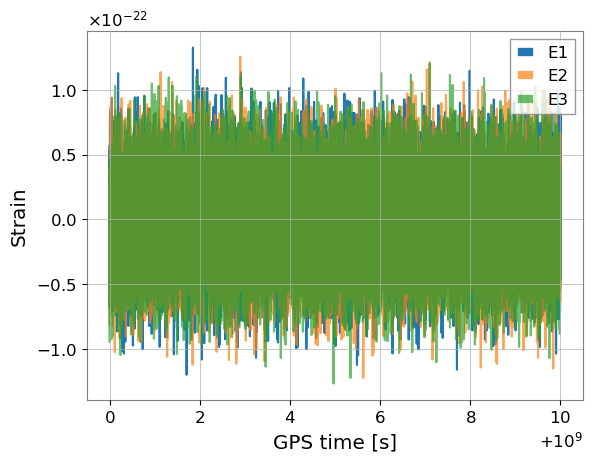

In [3]:
plt.figure()
ax = plt.gca()
ax.plot(data['E1'].times, data['E1'], label='E1')
ax.plot(data['E2'].times, data['E2'], label='E2', alpha=0.7)
ax.plot(data['E3'].times, data['E3'], label='E3', alpha=0.7)

ax.set_xlabel('GPS time [s]')
ax.set_ylabel('Strain')
ax.legend()

### Test `convert_to_frequency_series_with_psd`

In [5]:
fft, psd = convert_to_frequency_series_with_psd(data['E1'], return_psd=True)

Text(0, 0.5, 'PSD [1/Hz]')

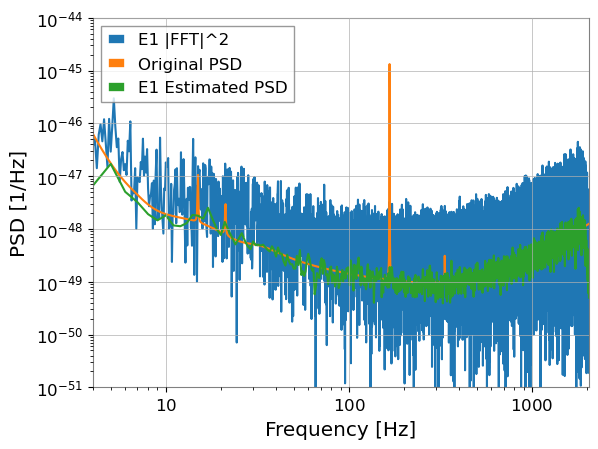

In [6]:
psd_estimated = data['E1'].psd(1.0)
plt.figure()
ax = plt.gca()
ax.loglog(fft.get_sample_frequencies(), np.abs(fft)**2, label='E1 |FFT|^2')
ax.loglog(psd.get_sample_frequencies(), psd, label='Original PSD')
ax.loglog(psd_estimated.frequencies, psd_estimated, label='E1 Estimated PSD')
ax.set_ylim(1e-51, 1e-44)
ax.set_xlim(4, 2048)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [1/Hz]')

### Test `convert_data_dict_to_frequency_series_dict`

In [3]:
data_freq, psds = convert_data_dict_to_frequency_series_dict(data)
print(data_freq)
print(psds)

{'E1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f23ac12c8e0>, 'E2': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f22f93e76a0>, 'E3': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f22f93e7700>}
{'E1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f23ac190220>, 'E2': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f23ac12c5e0>, 'E3': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f22f93e7580>}


## Tests of `likelihood.py`

In [4]:
model = MDCGaussianNoise(data_freq, psds)
print(model.lognl)

-58027.08180139975
